In [18]:
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv('Mall_Customers.csv')

In [20]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
data.shape

(200, 5)

In [22]:
# Data Preprocessing

In [23]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [26]:
# in this data gender column value is continous but in the model building we are taking numerical values
# Encode 'Gender' using OneHotEncoding
encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(data[['Gender']]).toarray()
gender_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))

In [27]:
gender_df

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [28]:
# Concatenate the encoded gender columns back with the main dataframe
data = pd.concat([data, gender_df], axis=1).drop('Gender', axis=1)

In [29]:
# Selecting features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]

In [30]:
features

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


In [31]:
# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [32]:
# Step 3: Determine the optimal number of clusters using the Elbow Method
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

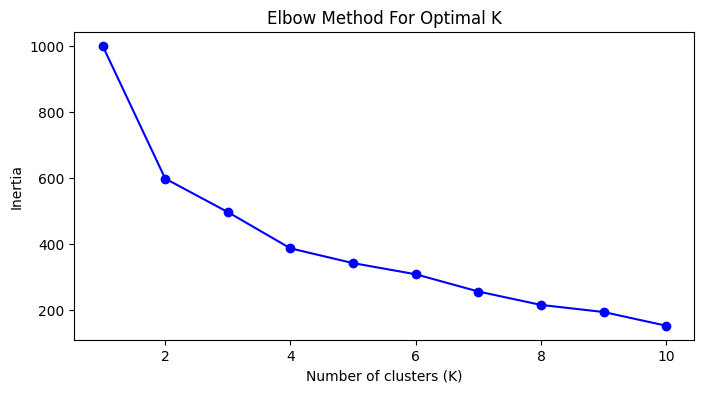

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [39]:
# Step 4: Fit the K-means model with the chosen number of clusters (e.g., K=4 based on the elbow plot)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

In [40]:
# Step 5: Evaluate the clustering results
# Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4375055914855597


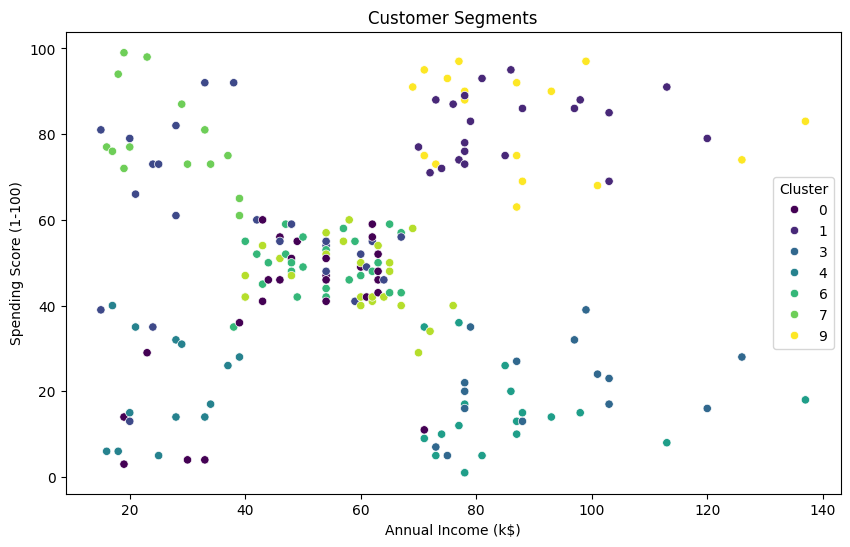

In [41]:
# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [45]:
# Step 7: Analyze the cluster profiles
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

# Display the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()
print(cluster_counts)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         71.653846  58.846154           48.692308               39.846154   
1        163.333333  32.190476           86.047619               81.666667   
2         54.440000  25.720000           40.400000               59.000000   
3        171.000000  44.600000           92.333333               21.600000   
4         23.461538  41.538462           26.538462               20.692308   
5        161.105263  38.473684           85.894737               14.210526   
6         80.840000  54.080000           53.240000               49.520000   
7         24.285714  25.857143           26.642857               79.142857   
8         94.416667  27.833333           58.125000               46.541667   
9        160.444444  33.277778           87.111111               82.666667   

         Gender_Female  Gender_Male  
Cluster                  

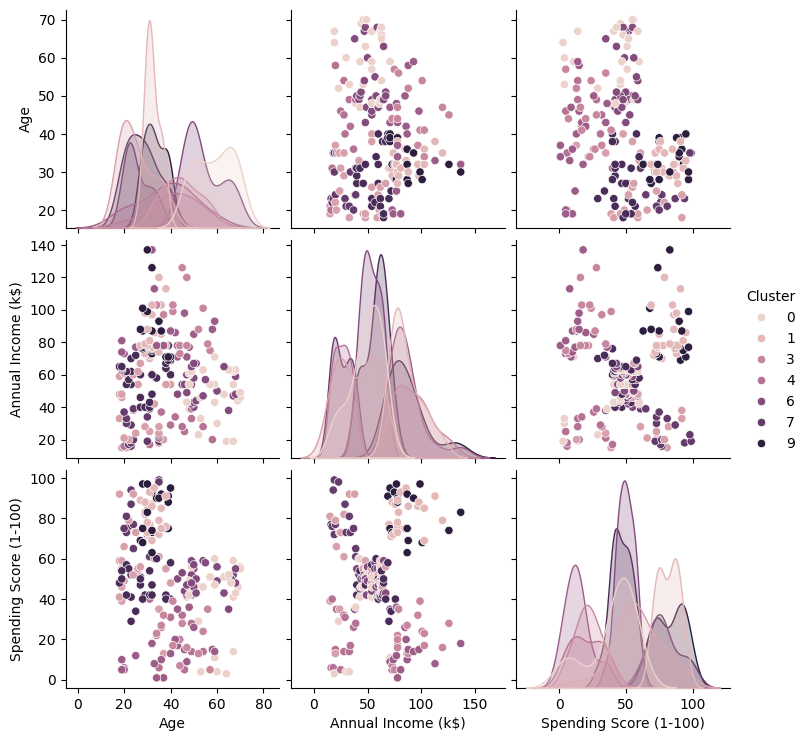

In [46]:
# Pair plot to visualize clusters based on different feature combinations
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()